In [1]:
import pickle, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
filename = '../results/DESKTOP-FRVMAO2_22_1_10_231829_979029_517_979029/state'

In [3]:
with open(filename, 'rb') as file:
    p = pickle.load(file)

In [4]:
p['params']['METRICS_URL']

'https://4d16-2804-954-ff64-2a00-cd46-c867-b355-6b27.ngrok.io'

In [5]:
p['params']['METRICS_URL'] = 'https://2076-2804-954-ff7c-6700-c1d3-f1b1-b0ae-fc66.ngrok.io'

In [6]:
with open('%s-2' % filename, 'wb') as file:
    pickle.dump(p, file)

In [7]:
p

{'trackers': {'best_ever': [<representation.individual.Individual at 0x7f9cbc2956a0>,
  'best_fitness_list': [[0.9825000564257304, 0.9824972351392111],
   [0.9828333854675293, 0.9824972351392111],
   [0.9833333889643351, 0.9829696416854858],
   [0.9845000505447388, 0.9841270446777344],
   [0.9855000575383505, 0.9854497909545898],
   [0.9856667319933573, 0.9854497909545898],
   [0.9856667319933573, 0.9854497909545898],
   [0.9863333900769552, 0.9861111640930176],
   [0.9863333900769552, 0.9861111640930176],
   [0.9863333900769552, 0.9863395094871521],
   [0.9863333900769552, 0.9863395094871521],
   [0.9876667062441508, 0.9872685670852661],
   [0.9876667062441508, 0.9872685670852661],
   [0.9876667062441508, 0.9872685670852661],
   [0.9876667062441508, 0.9872685670852661],
   [0.9878333806991577, 0.98759925365448],
   [0.9891667167345682, 0.9887566566467285],
   [0.9891667167345682, 0.9887566566467285],
   [0.9893333713213602, 0.9889219999313354],
   [0.9893333713213602, 0.98892199993133

In [8]:
evolution = [(np.max(pareto[0]), np.max(pareto[1])) for pareto in p['trackers']['first_pareto_list']]

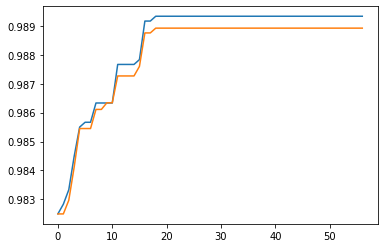

In [9]:
plt.plot(evolution)
plt.show()

In [2]:
data = []

In [3]:
for root, subdirs, files in os.walk('../results/'):
    if 'state' in files:
        with open('%s/state' % root, 'rb') as file:
            pk = pickle.load(file)
        params = pk['params']
        trackers = pk['trackers']
        grammar_name = params['GRAMMAR_NAME']
        dataset_name = params['DATASET_NAME']
        generations = params['GENERATIONS']
        for gen, fitness in enumerate(trackers['best_fitness_list']):
            data.append({
                'generations': generations,
                'grammar': grammar_name,
                'dataset': dataset_name,
                'generation': gen,
                'accuracy': fitness[0],
                'f1_score': fitness[1],
            })

In [4]:
df = pd.DataFrame.from_dict(data)
df

,generations,grammar,dataset,generation,accuracy,f1_score
0,30,assuncao,cifar10,0,0.592833,0.590983
1,30,assuncao,cifar10,1,0.592833,0.590983
2,30,assuncao,cifar10,2,0.592833,0.590983
3,30,assuncao,cifar10,3,0.592833,0.590983
4,30,assuncao,cifar10,4,0.620500,0.620835
...,...,...,...,...,...,...
1880,30,proposal,pathmnist,26,0.900186,0.899782
1881,30,proposal,pathmnist,27,0.900186,0.899782
1882,30,proposal,pathmnist,28,0.900186,0.899782
1883,30,proposal,pathmnist,29,0.900186,0.899782


In [5]:
df.to_csv('evolution_metrics.csv')

In [6]:
METRICS_URL = 'http://localhost:8000/api/analysis/'

r = requests.get(METRICS_URL)
 
df = pd.DataFrame.from_records(r.json())
df[['accuracy', 'f1_score']] = df[['accuracy', 'f1_score']].astype(float)
df[['size', 'num_layers', 'num_params', 'time']] = df[['size', 'num_layers', 'num_params', 'time']].astype(float).astype(int)
df['size'] = df['size']/(1024*1024)
 
df.groupby(['dataset', 'cnn']).agg([np.mean, np.std])

accuracy            f1_score  \
                                             mean       std      mean   
dataset          cnn                                                    
cifar10          Assunção et al. (2018)  0.792600  0.006045  0.794361   
                 DenseNet169             0.835250  0.021124  0.835840   
                 Diniz et al. (2018)     0.601500  0.020982  0.568948   
                 EfficientNetB1          0.762375  0.010429  0.763346   
                 InceptionV3             0.816775  0.013223  0.817947   
                 Lima et al. (2019)      0.631325  0.007913  0.613451   
                 Proposal                0.864825  0.004649  0.866519   
                 ResNet50V2              0.786125  0.014175  0.787304   
kmnist           Assunção et al. (2018)  0.966725  0.002457  0.967149   
                 DenseNet169             0.984375  0.003304  0.984627   
                 Diniz et al. (2018)     0.953600  0.005940  0.953866   
                 EfficientNetB1          0.976225  0.004827  0.976534   
                 InceptionV3             0.985925  0.001749  0.986118   
                 Lima et al. (2019)      0.953025  0.003750  0.953497   
                 Proposal                0.980725  0.000966  0.981133   
                 ResNet50V2              0.981975  0.001208  0.982207   
mnist            Assunção et al. (2018)  0.906325  0.269946  0.894475   
                 DenseNet169             0.995050  0.001075  0.994951   
                 Diniz et al. (2018)     0.985125  0.002539  0.984896   
                 EfficientNetB1          0.992975  0.001997  0.992764   
                 InceptionV3             0.995275  0.000980  0.995146   
                 Lima et al. (2019)      0.984475  0.004296  0.984251   
                 Proposal                0.995525  0.000617  0.995546   
                 ResNet50V2              0.994675  0.000693  0.994519   
octmnist         Assunção et al. (2018)  0.704100  0.027591  0.707636   
                 DenseNet169             0.764450  0.019286  0.768876   
                 Diniz et al. (2018)     0.641750  0.038384  0.639024   
                 EfficientNetB1          0.735000  0.030358  0.738295   
                 InceptionV3             0.713650  0.025155  0.717766   
                 Lima et al. (2019)      0.692650  0.011807  0.687009   
                 Proposal                0.765950  0.012479  0.768750   
                 ResNet50V2              0.738650  0.027167  0.742997   
organmnist_axial Assunção et al. (2018)  0.864704  0.002552  0.865320   
                 DenseNet169             0.939498  0.002979  0.939213   
                 Diniz et al. (2018)     0.873619  0.009326  0.873206   
                 EfficientNetB1          0.900492  0.028539  0.900702   
                 InceptionV3             0.913922  0.027103  0.913814   
                 Lima et al. (2019)      0.896797  0.007277  0.897025   
                 Proposal                0.927992  0.003661  0.927902   
                 ResNet50V2              0.914321  0.077857  0.914179   
pathmnist        Assunção et al. (2018)  0.839338  0.013144  0.838554   
                 DenseNet169             0.860606  0.054673  0.859684   
                 Diniz et al. (2018)     0.711595  0.133790  0.695295   
                 EfficientNetB1          0.811748  0.040513  0.810949   
                 InceptionV3             0.832368  0.090598  0.831573   
                 Lima et al. (2019)      0.868176  0.009782  0.867185   
                 Proposal                0.896887  0.008053  0.896218   
                 ResNet50V2              0.628893  0.142037  0.628160   

                                                         size            \
                                              std        mean       std   
dataset          cnn                                                      
cifar10          Assunção et al. (2018)  0.005467  166.639725  0.000000   
                 

In [75]:
def get_phenotype(row):
    data = {
        'grammar': row['grammar'],
        'dataset': row['dataset'],
        'accuracy': row['accuracy'],
        'f1_score': row['f1_score']
    }
    r = requests.get('http://localhost:8000/api/metrics/', params=data)
    result = r.json()
    if result:
        row['phenotype'] = result[0]['phenotype']
    return row

df2 = df[~df['dataset'].isin(['eurosat'])]
df2 = df2[df2['generation'].isin([0, 30])].apply(get_phenotype, axis=1)

In [76]:
df2

,accuracy,dataset,f1_score,generation,grammar,phenotype
0,0.592833,cifar10,0.590983,0,assuncao,"layer:conv 64 5 1 same linear 1 1 1, layer:con..."
30,0.797000,cifar10,0.796603,30,assuncao,"layer:conv 64 3 1 same linear 0 1 1, layer:poo..."
62,0.888000,kmnist,0.888036,0,assuncao,"layer:pool-max 3 1 same, layer:fc linear 1024 ..."
92,0.969833,kmnist,0.970451,30,assuncao,NaN
93,0.880000,mnist,0.751838,0,assuncao,"layer:conv 256 5 1 same linear 0 1 0, layer:po..."
123,0.996333,mnist,0.996363,30,assuncao,"layer:conv 32 5 1 same linear 0 0 0, layer:poo..."
124,0.587667,octmnist,0.587689,0,assuncao,"layer:pool-max 4 2 same, layer:conv 32 5 1 val..."
154,0.714000,octmnist,0.714534,30,assuncao,"layer:pool-avg 3 1 same, layer:conv 32 5 1 val..."
155,0.750947,organmnist_axial,0.751081,0,assuncao,"layer:pool-avg 1 2 valid, layer:pool-avg 2 1 v..."
185,0.873908,organmnist_axial,0.874020,30,assuncao,"layer:pool-max 2 2 same, layer:conv 32 3 2 sam..."


In [77]:
df2.to_csv('evolution_metrics2.csv')

In [84]:
from tensorflow.keras import callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda, Input
from tensorflow.image import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.stats import friedmanchisquare, rankdata
import numpy as np
import pandas as pd
import tensorflow as tf
import re, os, time, requests
import matplotlib.pyplot as plt

In [85]:
DATASETS = {
    'cifar10': {
        'shape': (32, 32, 3),
        'classes': 10,
        'proposal': '3(Conv BNorm),(Conv ),(Conv BNorm),(MaxPool Dropout),(Flatten),(Fc 1 512 Dropout),(Softmax),(Lr 0.001)',
        'De Lima': 'Conv2D 64 5 elu , MaxPooling2D 6 same , Dropout 0.15 , Dense 32 , Dense 32 ,',
        'Diniz': '(((conv*1)pool)*3)fc*0',
        'Assuncao': 'layer:conv 64 3 1 same linear 0 1 1, layer:pool-max 4 1 valid, layer:conv 256 3 1 valid relu 0 1 1, layer:pool-avg 4 3 same, layer:fc relu 2048 1, layer:fc sigmoid 256 0, layer:fc relu 1024 1, layer:fc sigmoid 256 1, layer:fc softmax, learning:gradient_descent 0.1'
    },
    'mnist': {
        'shape': (28, 28, 1),
        'classes': 10,
        'proposal': '3(Conv BNorm),(Conv ),(Conv BNorm),(MaxPool ),(Flatten),(Fc 2 256 ),(Softmax),(Lr 0.0001)',
        'De Lima': 'Conv2D 64 5 sigmoid , Conv2D 128 5 selu , Dense 256 , Dropout 0.8 , Dense 128 ,',
        'Diniz': '(((conv*1)pool)*2)fc*0',
        'Assuncao': 'layer:conv 32 5 1 same linear 0 0 0, layer:pool-max 5 1 same, layer:conv 64 4 3 valid linear 1 1 0, layer:pool-max 3 1 same, layer:fc sigmoid 1024 0, layer:fc linear 256 1, layer:fc sigmoid 128 1, layer:fc linear 256 1, layer:fc relu 128 0, layer:fc relu 512 0, layer:fc relu 2048 0, layer:fc linear 2048 1, layer:fc softmax, learning:gradient_descent 0.1'
    },
    'kmnist': {
        'shape': (28, 28, 1),
        'classes': 10,
        'proposal': '3(Conv BNorm),(Conv BNorm),(MaxPool ),(Flatten),(Fc 2 128 Dropout),(Softmax),(Lr 0.001)',
        'De Lima': 'Conv2D 128 7 sigmoid , AveragePooling2D 6 same , Dropout 0.15 , Dropout 0.3 , Dense 64 ,',
        'Diniz': '(((conv*1)pool)*2)fc*1',
        'Assuncao': 'layer:pool-max 3 1 same, layer:conv 256 5 1 valid relu 1 1 0, layer:pool-max 3 3 valid, layer:conv 64 2 1 same sigmoid 0 0 1, layer:conv 128 4 3 same relu 0 0 1, layer:conv 128 1 1 same linear 1 0 1, layer:conv 128 3 1 valid sigmoid 1 1 0, layer:fc linear 1024 0, layer:fc relu 512 1, layer:fc linear 2048 0, layer:fc relu 256 0, layer:fc linear 1024 0, layer:fc relu 2048 0, layer:fc softmax, learning:gradient_descent 0.1'
    },
    'pathmnist': {
        'shape': (28, 28, 3),
        'classes': 9,
        'proposal': '2(Conv ),(Conv ),(Conv ),(MaxPool Dropout),(Flatten),(Fc 1 64 ),(Softmax),(Lr 0.001)',
        'De Lima': 'Conv2D 32 3 elu , Conv2D 128 3 selu , AveragePooling2D 6 same , MaxPooling2D 4 same , Dropout 0.35 , Dense 64 ,',
        'Diniz': '(((conv*1)pool)*2)fc*0',
        'Assuncao': 'layer:conv 256 4 1 valid linear 1 0 0, layer:conv 64 5 1 same sigmoid 1 1 1, layer:pool-max 3 2 same, layer:pool-max 5 2 same, layer:fc sigmoid 2048 0, layer:fc linear 256 0, layer:fc relu 256 0, layer:fc relu 2048 1, layer:fc softmax, learning:gradient_descent 0.01'
    },
    'octmnist': {
        'shape': (28, 28, 1),
        'classes': 4,
        'proposal': '3(Conv ),(Conv BNorm),(Conv ),(MaxPool Dropout),(Flatten),(Fc 2 64 ),(Softmax),(Lr 0.001)',
        'De Lima': 'Conv2D 32 7 sigmoid , MaxPooling2D 6 valid , Dropout 0.1 , Dense 32 , Dense 32 ,',
        'Diniz': '(((conv*1)pool)*3)fc*0',
        'Assuncao': 'layer:pool-avg 3 1 same, layer:conv 32 5 1 valid relu 1 1 0, layer:conv 256 5 1 same linear 1 0 0, layer:conv 32 4 2 same linear 1 0 0, layer:conv 256 5 1 valid linear 0 1 0, layer:pool-max 2 1 valid, layer:pool-max 3 2 valid, layer:fc sigmoid 1024 1, layer:fc linear 512 1, layer:fc relu 256 1, layer:fc relu 256 0, layer:fc relu 256 0, layer:fc sigmoid 256 0, layer:fc sigmoid 128 1, layer:fc softmax, learning:gradient_descent 0.01'
    },
    'organmnist_axial': {
        'shape': (28, 28, 1),
        'classes': 11,
        'proposal': '3(Conv ),(Conv BNorm),(MaxPool Dropout),(Flatten),(Fc 1 64 Dropout),(Softmax),(Lr 0.001)',
        'De Lima': 'Conv2D 32 3 relu , AveragePooling2D 2 valid , Conv2D 128 3 elu , AveragePooling2D 6 same , Dropout 0.4 , Dense 32 ,',
        'Diniz': '(((conv*1)pool)*3)fc*0',
        'Assuncao': 'layer:pool-max 2 2 same, layer:conv 32 3 2 same linear 1 0 0, layer:pool-max 2 1 same, layer:conv 128 3 1 same relu 1 1 0, layer:conv 256 3 3 valid relu 0 0 1, layer:fc linear 256 0, layer:fc sigmoid 128 0, layer:fc sigmoid 256 1, layer:fc softmax, learning:gradient_descent 0.1'
    },
}

In [89]:
def build_proposal_model(row):
    
    phenotype = row['phenotype']
    dataset = DATASETS[row['dataset']]
    
    dataset_shape = dataset['shape']
    dataset_classes = dataset['classes']

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=dataset_shape))

    learning_rate = None
    filter_size = 32
    nconvs = 0

    nblocks = int(phenotype[0])

    for n in range(nblocks):

        for block in phenotype.split(','):

            if 'Conv' in block:

                if nconvs == 2:
                    filter_size *= 2
                    nconvs = 0

                model.add(layers.Conv2D(filter_size, (3, 3), activation='relu', padding='same'))

                if 'BNorm' in block:
                    model.add(layers.BatchNormalization())

                nconvs += 1

            if 'MaxPool' in block:
                model.add(layers.MaxPooling2D(pool_size=(2, 2)))

                if 'Dropout' in block:
                    model.add(layers.Dropout(0.25))


    for block in phenotype.split(','):

        if 'Flatten' in block:
            model.add(layers.Flatten())

        if 'Fc' in block:

            nfc, neurons = re.findall('\d+', block)

            for n in range(int(nfc)):
                model.add(layers.Dense(int(neurons)))
                model.add(layers.Activation('relu'))

            if 'Dropout' in block:
                model.add(layers.Dropout(0.5))

        if 'Softmax' in block:
            model.add(layers.Dense(dataset_classes, activation='softmax'))

        if 'Lr' in block:
            args = re.findall('\d+\.\d+', block)
            learning_rate = float(args[0])

    return model.count_params()

In [90]:
df3 = pd.read_csv('evolution_metrics2.csv')

In [95]:
df3['params'] = df3[df3['grammar'] == 'proposal'].apply(build_proposal_model, axis=1)

In [97]:
df3[df3['grammar'] == 'proposal']

,Unnamed: 0,accuracy,dataset,f1_score,generation,grammar,phenotype,params
36,651,0.822333,cifar10,0.822649,0,proposal,"2(Conv BNorm),(Conv BNorm),(Conv ),(MaxPool Dr...",2453802.0
37,681,0.857000,cifar10,0.858206,30,proposal,"3(Conv BNorm),(Conv ),(Conv BNorm),(MaxPool Dr...",6556586.0
38,713,0.979833,kmnist,0.980678,0,proposal,"3(Conv ),(Conv BNorm),(Conv BNorm),(MaxPool Dr...",2651946.0
39,743,0.982667,kmnist,0.982922,30,proposal,"3(Conv BNorm),(Conv ),(Conv ),(MaxPool ),(Flat...",2653034.0
40,744,0.993000,mnist,0.993056,0,proposal,"3(Conv BNorm),(Conv BNorm),(MaxPool Dropout),(...",299754.0
41,774,0.996000,mnist,0.995937,30,proposal,"3(Conv BNorm),(Conv ),(MaxPool Dropout),(Flatt...",361770.0
42,775,0.763000,octmnist,0.766090,0,proposal,"3(Conv BNorm),(Conv BNorm),(Conv BNorm),(MaxPo...",3538660.0
43,805,0.780000,octmnist,0.784877,30,proposal,"2(Conv BNorm),(Conv BNorm),(Conv ),(MaxPool Dr...",1894372.0
44,806,0.926220,organmnist_axial,0.926426,0,proposal,"3(Conv ),(Conv BNorm),(MaxPool Dropout),(Flatt...",361835.0
45,836,0.929370,organmnist_axial,0.929236,30,proposal,"3(Conv ),(Conv BNorm),(MaxPool Dropout),(Flatt...",361835.0
